# Calculating rates of return of securities

Return: the initial investment plus interest

Concepts:
How the rate of return is calculated:
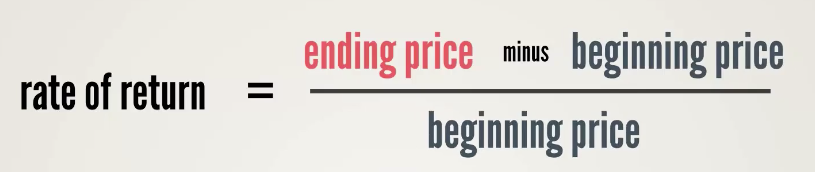

https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

Rate of Return of a portfolio is calculated by: 
    rate of return for a security * weight in portfolio

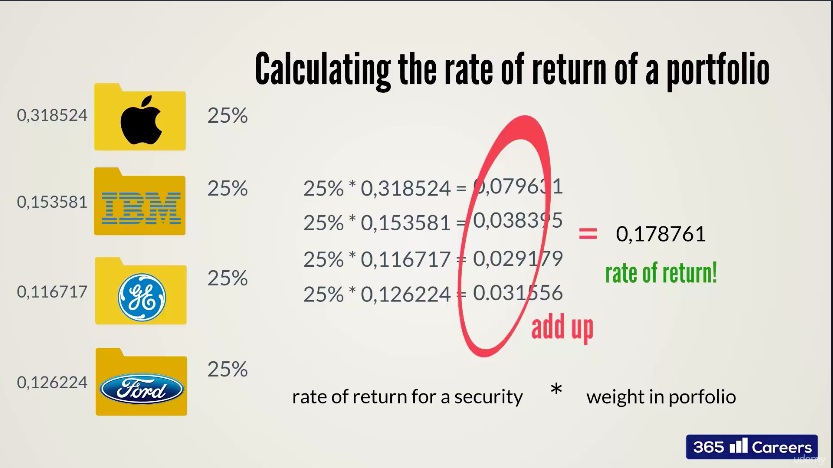

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import csv file with the 'Date' column as index

In [2]:
mydata=pd.read_csv('4_stocks_1995_2017.csv',index_col='Date')

Portfolio: Procter & Gambler, Microsft, Ford, General Electric

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5779 entries, 1995-01-03 to 2017-12-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5779 non-null   float64
 1   MSFT    5779 non-null   float64
 2   F       5779 non-null   float64
 3   GE      5779 non-null   float64
dtypes: float64(4)
memory usage: 225.7+ KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.960464,2.498429,5.091914,4.479902
1995-01-04,8.888638,2.516591,5.228918,4.479902
1995-01-05,8.762941,2.475080,5.183250,4.490882
1995-01-06,8.780898,2.516591,5.183250,4.468922
1995-01-09,8.744981,2.501024,5.274583,4.425002


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-12-06,91.250000,82.779999,12.380,17.660000
2017-12-07,90.099998,82.489998,12.530,17.709999
2017-12-08,90.370003,84.160004,12.610,17.709999
2017-12-11,90.230003,85.230003,12.580,17.650000
2017-12-12,90.055000,85.650002,12.525,17.959999


Normalization to 100:
    Pt/P0 * 100
    
We say this calculation will normalize our data to 100.
The first row divided by itself will produce 1
multiplied by 100 will give 100.

The idea of this operation is to compare the behavior of the four different stocks as if they were all starting from the same value 100.


In [6]:
mydata.iloc[0] #It extract the first row of the DataFrame

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03, dtype: float64

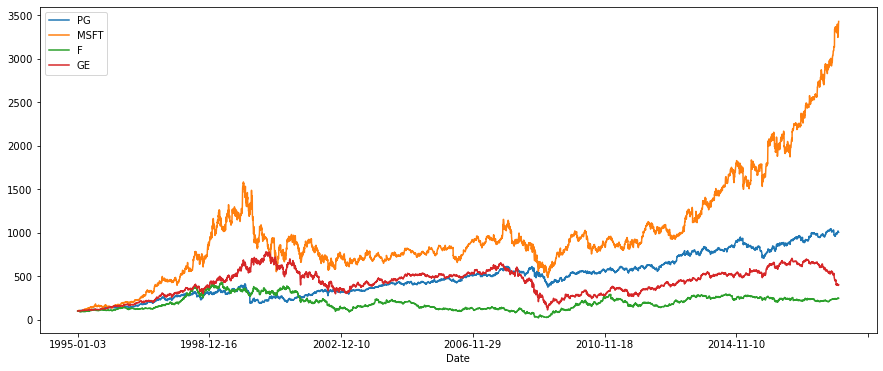

In [7]:
(mydata/mydata.iloc[0]*100).plot(figsize = (15,6));

# Calculating the Return of a Portfolio of Securities

In [8]:
returns=(mydata/mydata.shift(1)) -1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [9]:
weights = np.array([0.25,0.25,0.25,0.25]) #Assume equal weights

In [15]:
np.dot(returns, weights) #.dot method calculates vector or matrix products

array([        nan,  0.00653992, -0.00922976, ...,  0.00740659,
        0.00134944,  0.00404499])

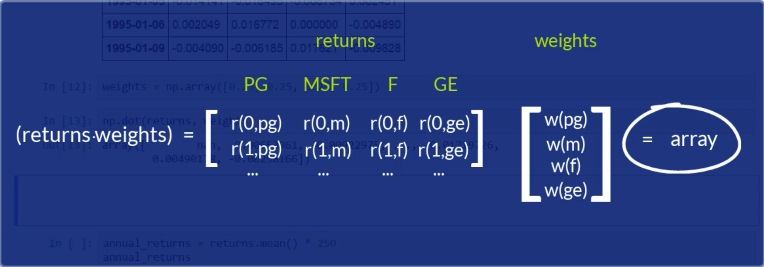

In [20]:
annual_return = returns.mean()*250
annual_return

PG      0.125201
MSFT    0.202795
F       0.118984
GE      0.102481
dtype: float64

In [21]:
np.dot(annual_return,weights)

0.1373651600530974

In [25]:
pfolio_1 = str(round(np.dot(annual_return,weights), 5) * 100) + ' %'
print (pfolio_1)

13.736999999999998 %


### The return of a second portfolio with different weights

In [26]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [28]:
pfolio_2 = str(round(np.dot(annual_return,weights_2), 5) * 100) + ' %'
print (pfolio_2)

15.417 %


# Indexes

In [30]:
ind_data=pd.read_csv('Indices_Data_1.csv',index_col='Date')

In [31]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
02/01/1997,737.010010,1280.699951,2848.800049
03/01/1997,748.030029,1310.680054,2859.300049
06/01/1997,747.650024,1316.400024,2881.300049
07/01/1997,753.229980,1327.729980,2886.100098
08/01/1997,748.409973,1320.349976,2906.300049


In [32]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
17/03/2017,2378.250000,5901.000000,12095.24023
20/03/2017,2373.469971,5901.529785,12052.90039
21/03/2017,2344.020020,5793.830078,11962.12988
22/03/2017,2348.449951,5821.640137,11904.12012
23/03/2017,2345.959961,5817.689941,12039.67969


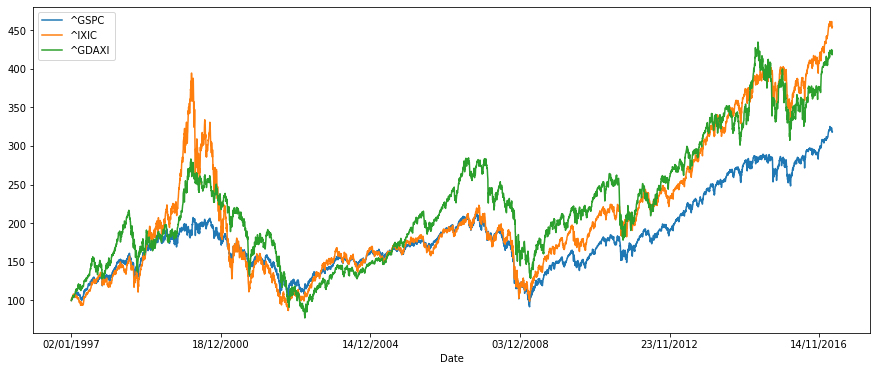

In [33]:
#Normalize to 100
(ind_data/ind_data.iloc[0]*100).plot(figsize=(15,6));
plt.show()

In [34]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
17/03/2017,-0.001314,0.000041,0.000998
20/03/2017,-0.002010,0.000090,-0.003501
21/03/2017,-0.012408,-0.018249,-0.007531
22/03/2017,0.001890,0.004800,-0.004849
23/03/2017,-0.001060,-0.000679,0.011388


In [35]:
annual_ind_returns = ind_returns.mean()*250
annual_ind_returns

^GSPC     0.075836
^IXIC     0.107076
^GDAXI    0.100426
dtype: float64